# Telecom Churn Case Study

In the telecom industry, customers can choose from multiple service providers and actively switch from one operator to another. The telecommunications industry experiences an average 15-25% annual churn rate in this highly competitive market. Given that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become even more important than customer acquisition. 

For many incumbent operators, retaining highly profitable customers is the first business goal.
 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In the **Indian and Southeast Asian markets**, approximately **80% of revenue** comes from the **top 20% of customers (called high-value customers)**. Thus, if we can reduce the churn of high-value customers, we can significantly minimise revenue leakage. In this project, you will define high-value customers based on a certain metric (mentioned later below) and **predict churn only on high-value customers.**

## Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of the customer lifecycle :

**The ‘good’ phase**: The customer is happy with the service and behaves as usual.

**The ‘action’ phase**: The customer experience starts to sore in this phase; e.g. they get a compelling offer from a  competitor, face unjust charges, become unhappy with service quality, etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality, etc.)

**The ‘churn’ phase**: The customer is said to have churned in this phase. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e., the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.

## 1. Reading Data

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
# Reading the 'csv' file into a dataframe

telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


## 2. Inspecting the dataframe

In [3]:
# Dimensions of the dataframe

telecom.shape

(99999, 226)

In [4]:
# Statistical aspects of the dataframe

telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
# Datatype of each column

telecom.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

## 3. Data Preparation

### Handling Columns with unique values

In [6]:
# Checking for columns with no. of unique values=1

uniq_cols = list(telecom.loc[:,telecom.nunique()==1].columns)
uniq_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [7]:
# Dropping the above columns with no. of unique values = 1

telecom.drop(uniq_cols, 1, inplace=True)
telecom.shape

(99999, 210)

### Handling datatypes of the columns

In [8]:
# Checking the columns with 'object' datatype

date_col = telecom.loc[:,telecom.dtypes == 'object'].columns
date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [9]:
# Converting object into datetime datatype

telecom[date_col] = telecom[date_col].apply(pd.to_datetime)
telecom[date_col]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
1,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
2,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
3,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
4,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...
99994,2014-06-03,2014-07-20,2014-08-26,2014-09-25,NaT,NaT,NaT,NaT
99995,2014-06-17,2014-07-17,2014-08-24,2014-09-26,NaT,NaT,NaT,NaT
99996,2014-06-13,2014-07-26,NaT,2014-09-02,2014-06-13,NaT,NaT,NaT
99997,2014-06-17,2014-07-19,2014-08-20,2014-09-17,2014-06-17,2014-07-19,2014-08-20,2014-09-17


### Handling Missing Values

In [10]:
# Checking for missing values(in percenatge)

(round(telecom.isnull().sum()/len(telecom.index)*100,2)).sort_values(ascending=False)

max_rech_data_6     74.85
fb_user_6           74.85
count_rech_3g_6     74.85
count_rech_2g_6     74.85
night_pck_user_6    74.85
                    ...  
max_rech_amt_9       0.00
max_rech_amt_8       0.00
max_rech_amt_7       0.00
max_rech_amt_6       0.00
sep_vbc_3g           0.00
Length: 210, dtype: float64

In [11]:
# Checking for columns with more than 70% null values

telecom.loc[:,(telecom.isnull().sum()/len(telecom.index)*100)>70].columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [12]:
# Checking the null values of the 'recharge data' columns month wise

telecom[['date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 
        'date_of_last_rech_data_7','total_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7',
         'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8',
         'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',  'av_rech_amt_data_9']]

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,av_rech_amt_data_9
0,2014-06-21,1.0,252.0,252.0,2014-07-16,1.0,252.0,252.0,2014-08-08,1.0,252.0,252.0,NaT,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,2014-07-25,1.0,154.0,154.0,2014-08-10,2.0,25.0,50.0,NaT,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2014-09-17,1.0,46.0,46.0
3,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,2014-06-04,1.0,56.0,56.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
99995,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
99996,2014-06-13,2.0,25.0,39.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
99997,2014-06-17,3.0,202.0,583.0,2014-07-19,2.0,179.0,358.0,2014-08-20,4.0,179.0,716.0,2014-09-17,4.0,252.0,862.0


The null values in columns **'date_of_last_rech_data', 'total_rech_data', 'max_rech_data' and 'av_rech_amt_data'** indicate that the customer has not made any recharge for the mobile internet thus, it would be better to impute the recharge amount with 0

In [13]:
# Imputing 0 in the columns of 'total_rech_data', 'max_rech_data' and 'av_rech_amt_data'

cols = ['total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 
        'total_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7',
          'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8',
          'total_rech_data_9', 'max_rech_data_9',  'av_rech_amt_data_9']

telecom[cols] = telecom[cols].replace(np.nan, 0)

As for the other columns with high missing value percentage(more than 70%), they are not going to be significant in further calculations, therfore it would be best to drop them

In [14]:
# Dropping columns with more than 70% null values
telecom = telecom.loc[:,(telecom.isnull().sum()/len(telecom.index)*100)<70]

# Checking for the missing values(in percentage) again
(round(telecom.isnull().sum()/len(telecom.index)*100,2)).sort_values(ascending=False)

loc_og_t2f_mou_9    7.75
std_og_t2t_mou_9    7.75
std_ic_t2f_mou_9    7.75
loc_og_t2m_mou_9    7.75
std_ic_t2m_mou_9    7.75
                    ... 
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
total_rech_amt_8    0.00
sep_vbc_3g          0.00
Length: 182, dtype: float64

As the column **'date_of_last_rech_data'** for each month has been dropped then it would be wise to drop the **'date_of_last_rech'** columns

In [15]:
# Dropping the datetime format columns
telecom.drop(telecom.loc[:,telecom.dtypes == 'datetime64[ns]'].columns, axis=1,inplace=True)

#Shape of the dataset
telecom.shape

(99999, 178)

In [16]:
# Checking for the missing values(in percentage) again

(round(telecom.isnull().sum()/len(telecom.index)*100,2)).sort_values(ascending=False)

std_og_t2t_mou_9    7.75
roam_ic_mou_9       7.75
loc_ic_mou_9        7.75
loc_og_t2c_mou_9    7.75
std_og_t2m_mou_9    7.75
                    ... 
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
total_rech_amt_8    0.00
sep_vbc_3g          0.00
Length: 178, dtype: float64

### Filtering high-value customers(HVCs)

**High-value customers** as – those who have recharged with an amount more than or equal to X, where X is the **70th percentile** of the average recharge amount in the first two months(i.e. the good phase).

In [17]:
# Calculating the total amount recharge for data from avg recharge amount in months 6 and 7 
telecom['total_rech_amnt_data_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6

telecom['total_rech_amnt_data_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

# Calculating overall recharge amount for months 6 and 7
telecom['overall_rech_amnt_dta_6'] = telecom.total_rech_amnt_data_6 + telecom.total_rech_amt_6

telecom['overall_rech_amnt_dta_7'] = telecom.total_rech_amnt_data_7 + telecom.total_rech_amt_7

# Calculating the average recharge amount of months 6 and 7
telecom['Av_rech_amnt_6_7'] = (telecom['overall_rech_amnt_dta_6'] + telecom['overall_rech_amnt_dta_7'])/2

# Calculating cutoff i.e. 70th percentile of avg recharge of two months for high value customers
Cutoff = telecom.Av_rech_amnt_6_7.quantile(0.7)
Cutoff

478.0

In [18]:
# Filtering HVCs
telecom = telecom[telecom.Av_rech_amnt_6_7 >= Cutoff]

# Checking the shape
telecom.shape

(30001, 183)

In [19]:
# Checking for the missing values(in percentage) again

(round(telecom.isnull().sum()/len(telecom.index)*100,2)).sort_values(ascending=False)

loc_ic_t2f_mou_9    6.34
spl_og_mou_9        6.34
loc_og_t2m_mou_9    6.34
loc_og_t2f_mou_9    6.34
loc_ic_t2t_mou_9    6.34
                    ... 
max_rech_amt_8      0.00
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
Av_rech_amnt_6_7    0.00
Length: 183, dtype: float64

In [20]:
# Checking the datatypes of all columns

telecom.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 183 columns):
 #    Column                   Dtype  
---   ------                   -----  
 0    mobile_number            int64  
 1    arpu_6                   float64
 2    arpu_7                   float64
 3    arpu_8                   float64
 4    arpu_9                   float64
 5    onnet_mou_6              float64
 6    onnet_mou_7              float64
 7    onnet_mou_8              float64
 8    onnet_mou_9              float64
 9    offnet_mou_6             float64
 10   offnet_mou_7             float64
 11   offnet_mou_8             float64
 12   offnet_mou_9             float64
 13   roam_ic_mou_6            float64
 14   roam_ic_mou_7            float64
 15   roam_ic_mou_8            float64
 16   roam_ic_mou_9            float64
 17   roam_og_mou_6            float64
 18   roam_og_mou_7            float64
 19   roam_og_mou_8            float64
 20   roam_og_mou_9            f

### Imputing missing values

1. Above information indicate that **all columns** are of **numerical datatypes**. 
2. The highest missing data percentage present is around 6%.
3. Therefore, Imputation can be done easily using KNNImputer.

In [21]:
# Assigning the names of all the columns as all of them are numerical

Cols = list(telecom.columns)

In [22]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
telecom[Cols] = scalar.fit_transform(telecom[Cols])

# Calling the KNN Imputer function
knn = KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
start_time = time.time()

telecom_data_knn = pd.DataFrame(knn.fit_transform(telecom[Cols]))
telecom_data_knn.columns = telecom[Cols].columns

end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds\n")


Execution Time =  107.11 seconds



In [23]:
# Converting the scaled data back to the original data
telecom[Cols]=scalar.inverse_transform(telecom_data_knn)

# Checking the top 10 data
telecom.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amnt_data_6,total_rech_amnt_data_7,overall_rech_amnt_dta_6,overall_rech_amnt_dta_7,Av_rech_amnt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,315.0,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,720.0,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,604.0,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.000000,0.00,0.000000,0.00,...,1328.0,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5
38,7.000815e+09,363.987,486.558,393.909,391.709,248.99,619.960000,666.38,494.790000,88.86,...,1155.0,0.00,0.00,0.00,0.00,0.0,0.0,420.0,636.0,528.0
41,7.000721e+09,482.832,425.764,229.769,143.596,86.39,118.880000,80.44,40.060000,232.36,...,2010.0,0.00,0.00,0.00,0.00,0.0,0.0,496.0,510.0,503.0
48,7.000294e+09,1873.271,575.927,179.218,1189.744,2061.69,881.430000,156.91,1589.230000,1087.76,...,1265.0,0.00,0.00,0.00,0.00,0.0,0.0,2317.0,580.0,1448.5
53,7.002189e+09,978.077,1141.296,706.020,1076.247,135.14,119.590000,102.69,99.830000,479.31,...,697.0,0.00,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0


In [24]:
# Checking for overall missing data

telecom.isnull().sum().sum()

0

All null values have been imputed therfore, No missing data is present.

### Tagging the churners

Tag the **churned customers (churn=1, else 0)** based on the **fourth month(i.e. 9)** as – those who have **not made any calls** (either incoming or outgoing) AND have **not used mobile internet** even once in that **churn phase**. The attributes you need to use to tag churners are:

1. **total_ic_mou_9**

2. **total_og_mou_9**

3. **vol_2g_mb_9**

4. **vol_3g_mb_9**

In [25]:
# Checking the columns required for tagging the churners

Churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
telecom[Churn_cols]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74
...,...,...,...,...
99981,391.63,64.21,0.00,0.00
99984,149.26,14.44,723.41,232.56
99986,547.11,1095.24,9.14,941.48
99988,265.84,182.16,0.05,393.34


In [26]:
# Initializing the target variable 'Churn'

telecom['Churn'] = 0
telecom['Churn'] = np.where(telecom[Churn_cols].sum(axis=1) == 0, 1, 0)

# Checking the 'Churn' variable in the dataset
telecom.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amnt_data_6,total_rech_amnt_data_7,overall_rech_amnt_dta_6,overall_rech_amnt_dta_7,Av_rech_amnt_6_7,Churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.000000,0.00,0.000000,0.00,...,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5,0
38,7.000815e+09,363.987,486.558,393.909,391.709,248.99,619.960000,666.38,494.790000,88.86,...,0.00,0.00,0.00,0.00,0.0,0.0,420.0,636.0,528.0,0
41,7.000721e+09,482.832,425.764,229.769,143.596,86.39,118.880000,80.44,40.060000,232.36,...,0.00,0.00,0.00,0.00,0.0,0.0,496.0,510.0,503.0,0
48,7.000294e+09,1873.271,575.927,179.218,1189.744,2061.69,881.430000,156.91,1589.230000,1087.76,...,0.00,0.00,0.00,0.00,0.0,0.0,2317.0,580.0,1448.5,0
53,7.002189e+09,978.077,1141.296,706.020,1076.247,135.14,119.590000,102.69,99.830000,479.31,...,0.00,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0,0


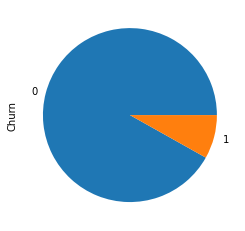

0    0.918636
1    0.081364
Name: Churn, dtype: float64

In [27]:
# Pie plot for churn percentage
telecom.Churn.value_counts(normalize=True).plot(kind='pie')
plt.show()

# Value count percentage of Churn(1) and Non-Churn(0)
telecom.Churn.value_counts(normalize=True)

Above information indicate a **class imbalance** between the churn and non-churn customers as **approx 91%** are under **non-churn category**.

### Removing attributes of the churn phase

After tagging churners, **remove all the attributes corresponding to the churn phase** (all attributes having ‘ _9’, etc., in their names).

In [28]:
# Checking for the columns corresponding to churn phase(of month 9)

Cols_9 = telecom.filter(regex='_9').columns
Cols_9

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [29]:
# Dropping the columns of churn phase
telecom.drop(Cols_9, axis=1, inplace=True)

# Checking the shape of the dataset
telecom.shape

(30001, 141)

### Dropping column variables

In [30]:
# Dropping the columns related to derived columns created in good phase to filter HVCs

telecom.drop(['total_rech_amnt_data_6', 'total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_amt_6',
             'total_rech_amnt_data_7', 'total_rech_data_7', 'av_rech_amt_data_7', 'total_rech_amt_7'],
            axis=1, inplace=True)

In [31]:
# checking the correlation amongst the independent variables
telecom_corr = telecom.corr()
telecom_corr.loc[:,:] = np.tril(telecom_corr, k=-1)
telecom_corr = telecom_corr.stack()
telecom_corr
telecom_corr[(telecom_corr > 0.80) | (telecom_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                     0.955351
isd_og_mou_8        isd_og_mou_7               0.943433
                    isd_og_mou_6               0.919641
isd_og_mou_7        isd_og_mou_6               0.916237
sachet_2g_8         total_rech_data_8          0.900629
total_ic_mou_6      loc_ic_mou_6               0.895099
total_ic_mou_8      loc_ic_mou_8               0.893072
total_ic_mou_7      loc_ic_mou_7               0.883070
std_og_t2t_mou_8    onnet_mou_8                0.860483
std_og_t2t_mou_7    onnet_mou_7                0.860275
std_og_t2t_mou_6    onnet_mou_6                0.859593
Av_rech_amnt_6_7    overall_rech_amnt_dta_7    0.856275
std_og_t2m_mou_7    offnet_mou_7               0.854685
std_og_t2m_mou_8    offnet_mou_8               0.851049
total_og_mou_8      std_og_mou_8               0.848858
total_og_mou_7      std_og_mou_7               0.848825
loc_ic_mou_8        loc_ic_t2m_mou_8           0.847512
std_ic_mou_8        std_ic_t2m_mou_8           0

In [32]:
# Dropping the highly correlated variables from above
telecom.drop(['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8'], axis=1, inplace=True)

# Checking the shape of the dataframe
telecom.shape

(30001, 121)

### Deriving new variables

In [33]:
# Deriving new variable "aon_mnthly" from "aon" by converting days into months
telecom['aon_mnthly'] = round((telecom.aon/30),0)
telecom.aon_mnthly.head()

0     32.0
7     27.0
8     10.0
21    24.0
23    20.0
Name: aon_mnthly, dtype: float64

In [34]:
# Assigning columns to be dropped from which new columns have been derived

Cols_to_drop = ['aon']

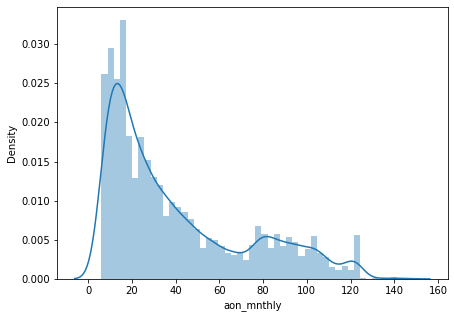

In [35]:
# Distribution plot of aon across months

plt.figure(figsize=[7,5])
sns.distplot(telecom.aon_mnthly)
plt.show()

In [36]:
# Creating ranges of months from aon_months

aon_range = [0, 6, 12, 24, 60, 61]
aon_labels = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom['aon_mnth_range'] = pd.cut(telecom.aon_mnthly, aon_range, labels=aon_labels)
telecom.aon_mnth_range.head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: aon_mnth_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

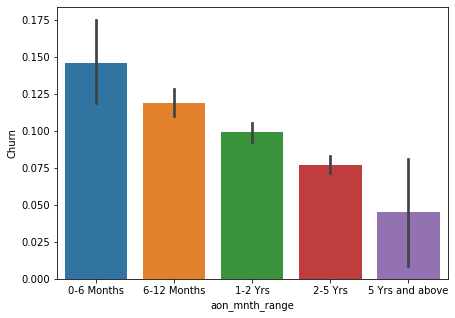

In [37]:
# Bar plot b/w aon_range and churn

plt.figure(figsize=[7,5])
sns.barplot(x='aon_mnth_range', y='Churn', data=telecom)
plt.show()

1. From above plot, it is clear that the **highest churn rate** is from **short duration(i.e. 6 months) network users**.
2. The Churn rate gradually decreases as the duration increases.

In [38]:
# Creating a varaible for an overall avg. revenue per user(arpu) for the good phase

telecom['arpu_6_7'] = (telecom.arpu_6 + telecom.arpu_7)/2
telecom.arpu_6_7.head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: arpu_6_7, dtype: float64

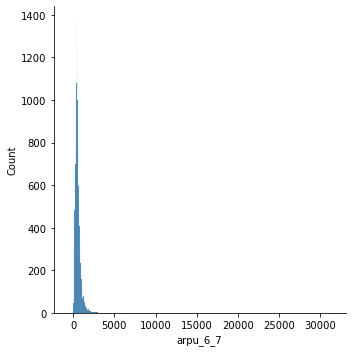

In [39]:
# plot distribution of arpu of good phase

sns.displot(telecom.arpu_6_7)
plt.show()

In [40]:
# Adding more Columns to dropped and dropping them from the dataset
Cols_to_drop+= ['arpu_6','arpu_7']
telecom.drop(Cols_to_drop,axis=1, inplace=True)

# shape of the dataset
telecom.shape

(30001, 121)

## Data Visualisation

### Heatmap

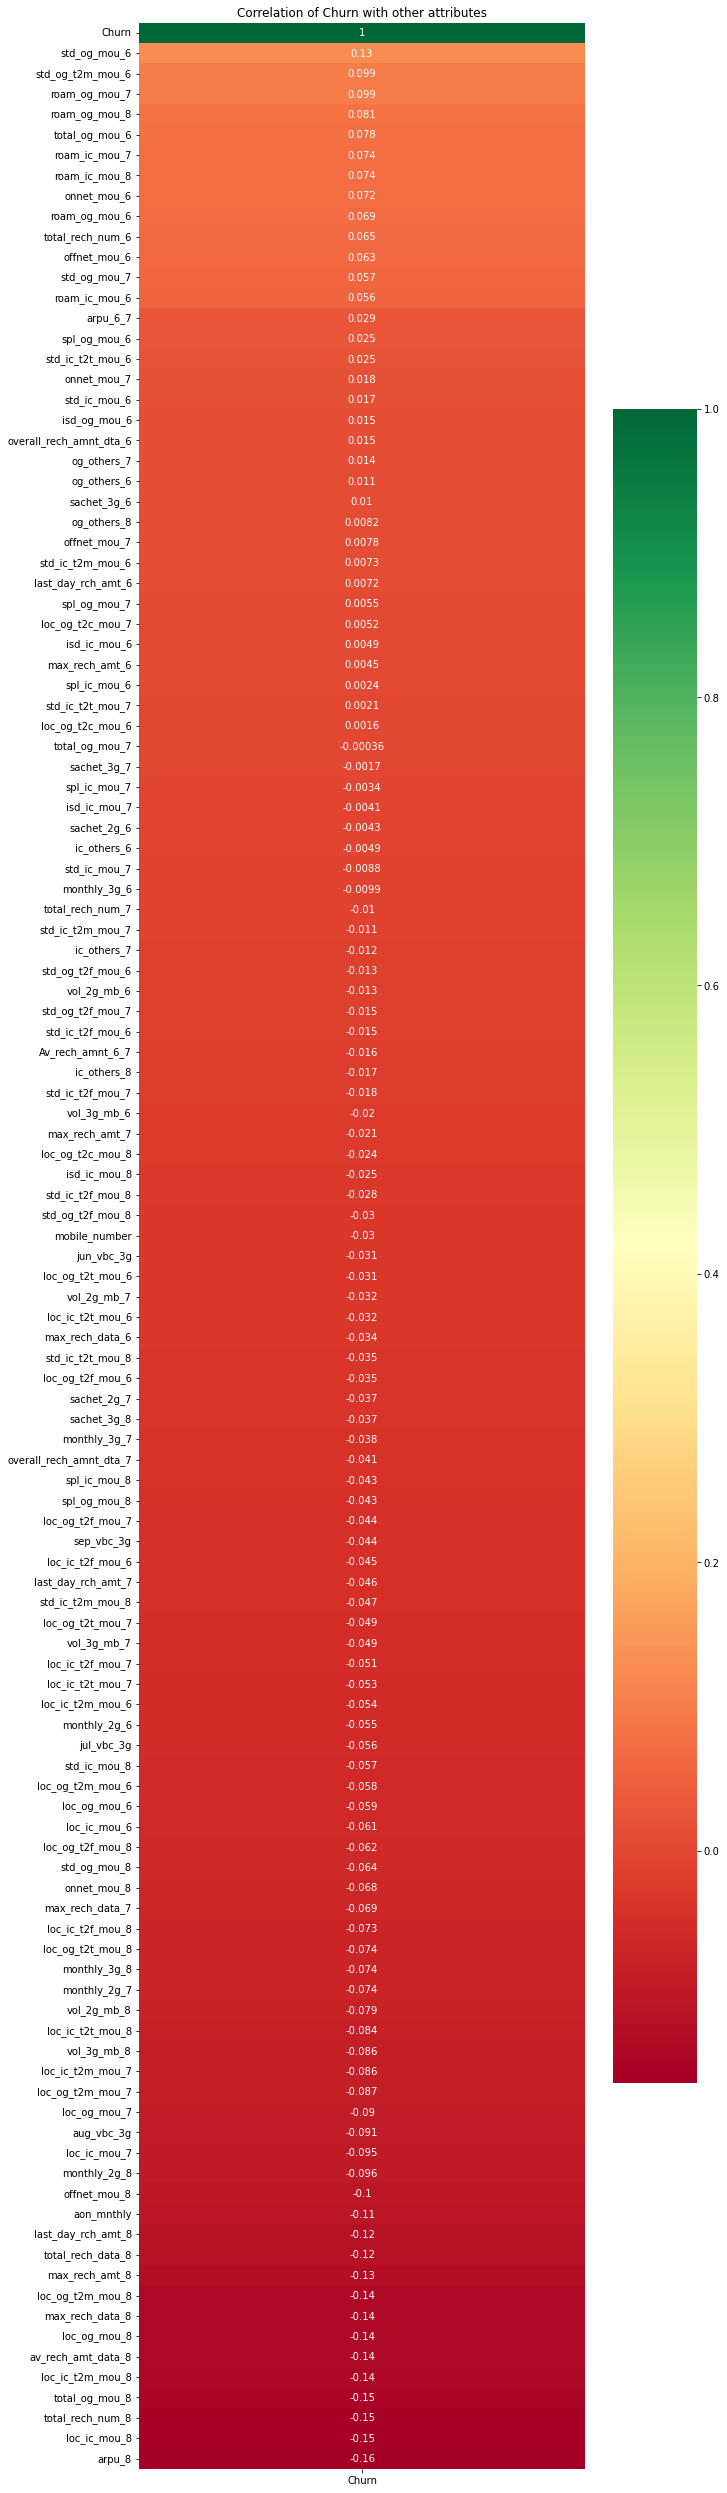

In [41]:
# Checking the correlation of target variable(Churn) against all independent variables

plt.figure(figsize=[10,45])
plt.title('Correlation of Churn with other attributes')
sns.heatmap(telecom.corr()[['Churn']].sort_values('Churn', ascending=False), annot=True, cmap='RdYlGn')
plt.show()

1. Avg. Outgoing and roaming calls of month 6 and 7 are positively related with Churn.
2. Avg revenue and recharge of month 8 have negative correlation with Churn.

### Scatter plot

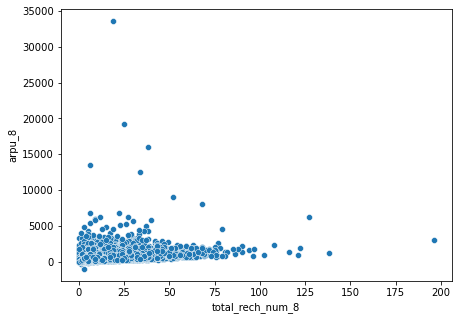

In [42]:
# Scatter plot b/w avg revenue and total recharge for month 8(i.e. action phase)

plt.figure(figsize=[7,5])
sns.scatterplot(x='total_rech_num_8', y='arpu_8', data=telecom)
plt.show()

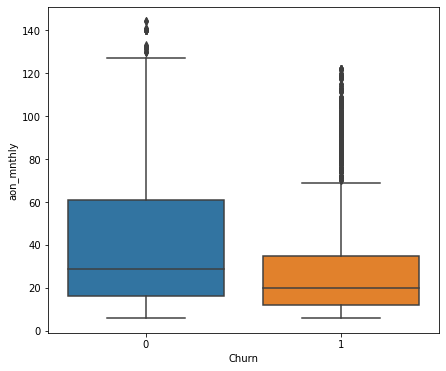

In [43]:
# Boxplot of monthly age of network(aon_mnthly) and Churn

plt.figure(figsize=[7,6])
sns.boxplot(x='Churn', y='aon_mnthly', data=telecom)
plt.show()

1. Aforementioned plot indicates that the median of monthly usage of a network for churners is around 20 months which is less   than those of the non-churners(i.e. around 30 months).
2. Therfore,churners use a particular network for less period of time.

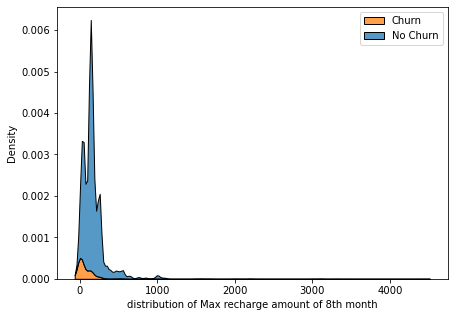

In [44]:
# Plot between churn vs max rechare amount

plt.figure(figsize=[7,5])
sns.kdeplot(x='max_rech_amt_8', hue='Churn', data=telecom, multiple='stack')
plt.xlabel('distribution of Max recharge amount of 8th month')
plt.legend(['Churn','No Churn'])
plt.show()

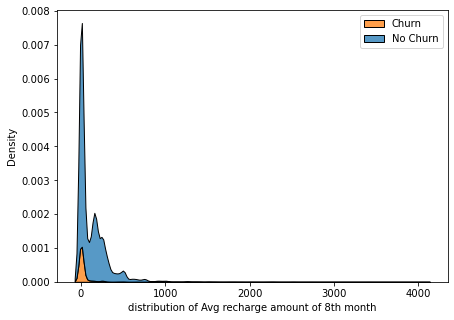

In [45]:
# Plot between churn vs Avg rechare amount

plt.figure(figsize=[7,5])
sns.kdeplot(x='av_rech_amt_data_8', hue='Churn', data=telecom, multiple='stack')
plt.xlabel('distribution of Avg recharge amount of 8th month')
plt.legend(['Churn','No Churn'])
plt.show()

The density of churns is lower in both the cases i.e. max and avg recharge for the 8th month, which clearly indicates that the churners do **minimum or negligible recharges** during the action phasr(i.e. 8th month).

### Countplot

In [46]:
# Creating categories for month 8 column totalrecharge and their count

tot_rech_dta_range = [-1,0,10,25,100]
tot_rech_num_range = [-1,0,10,25,1000]
rech_labels = ["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"]
telecom['total_rech_data_group_8'] = pd.cut(telecom.total_rech_data_8, tot_rech_dta_range, labels=rech_labels)
telecom['total_rech_num_group_8'] = pd.cut(telecom.total_rech_num_8, tot_rech_num_range, labels=rech_labels)

			Distribution of total recharge data for 8th month
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


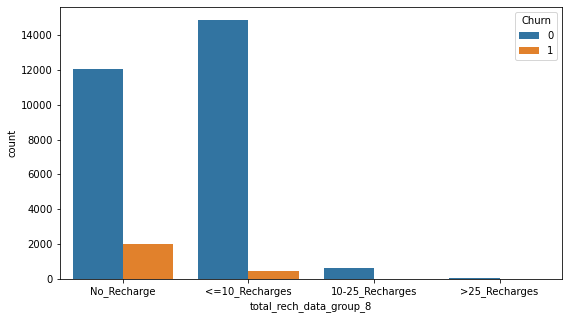





			Distribution of total recharge numbers for 8th month
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


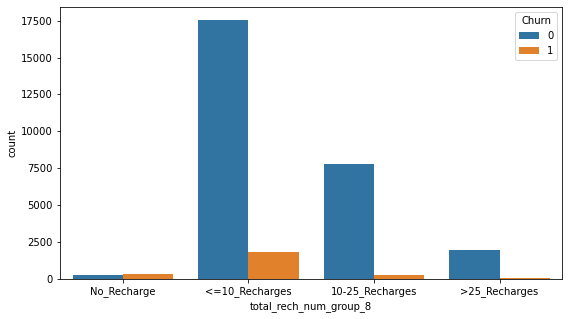

In [47]:
# Countplot of each category of churn with total recharge data and number groups

print('\t\t\tDistribution of total recharge data for 8th month\n',telecom.total_rech_data_group_8.value_counts())
plt.figure(figsize=[9,5])
sns.countplot(x='total_rech_data_group_8', hue='Churn', data=telecom)
plt.show()
print('\n\n\n')
print('\t\t\tDistribution of total recharge numbers for 8th month\n',telecom.total_rech_data_group_8.value_counts())
plt.figure(figsize=[9,5])
sns.countplot(x='total_rech_num_group_8', hue='Churn', data=telecom)
plt.show()

**During the 8th month(action phase),**
1. The churn rate is higher for no recharges and then gradually decrasing in each case of total recharge data which shows that the usage of data has been minimized.
2. In total recharge numbers, churn rate decreases as recharge rate increases.

## Data Pre-Processing

### Creating dummy variables

In [48]:
# Creating dummy variables for total recharge data and number groups and monthly aon

get_dummies = pd.get_dummies(telecom[['total_rech_data_group_8', 'total_rech_num_group_8', 'aon_mnth_range']], drop_first=True)
get_dummies.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,aon_mnth_range_6-12 Months,aon_mnth_range_1-2 Yrs,aon_mnth_range_2-5 Yrs,aon_mnth_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [49]:
# Merging the dummies to telecom dataframe

telecom = pd.concat([telecom, get_dummies], axis=1)
telecom.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,aon_mnth_range_6-12 Months,aon_mnth_range_1-2 Yrs,aon_mnth_range_2-5 Yrs,aon_mnth_range_5 Yrs and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,...,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,7.002124e+09,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,7.000887e+09,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [50]:
# Dropping the uneccessary columns
telecom.drop(['sep_vbc_3g', 'total_rech_data_group_8', 'total_rech_num_group_8', 
              'aon_mnth_range', 'aon_mnthly','mobile_number'], axis=1, inplace=True)

# Checking the shape
telecom.shape

(30001, 127)

### Splitting of the data

In [51]:
# split the data into X and y
X = telecom.drop('Churn', axis=1)
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,aon_mnth_range_6-12 Months,aon_mnth_range_1-2 Yrs,aon_mnth_range_2-5 Yrs,aon_mnth_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,...,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [52]:
y = telecom.Churn
y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int32

In [53]:
# importing required libraries for train-test split
from sklearn.model_selection import train_test_split 

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
print('dimensions of training data: ',X_train.shape,'\n',
     'dimensions of testing data: ',X_test.shape)

dimensions of training data:  (21000, 126) 
 dimensions of testing data:  (9001, 126)


In [54]:
# Checking the train dataset
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,aon_mnth_range_6-12 Months,aon_mnth_range_1-2 Yrs,aon_mnth_range_2-5 Yrs,aon_mnth_range_5 Yrs and above
15709,193.741,1.73,4.33,2.56,35.21,35.29,57.36,0.0,0.00,0.0,...,1,0,0,1,0,0,0,0,0,0
28202,110.863,3.64,0.00,0.00,13.64,0.00,0.00,0.0,0.00,0.0,...,1,0,0,1,0,0,0,0,1,0
14943,123.394,6.46,2.24,7.68,32.29,72.36,51.53,0.0,0.00,0.0,...,1,0,0,0,1,0,1,0,0,0
92007,785.751,1208.89,859.78,541.99,1193.03,1718.64,741.86,0.0,110.71,0.0,...,1,0,0,1,0,0,0,0,1,0
56403,248.981,587.43,423.23,52.34,487.91,451.76,141.43,0.0,0.00,0.0,...,0,0,0,0,1,0,0,1,0,0


### Feature Scaling

In [55]:
# importing libraries for scaling
from sklearn.preprocessing import MinMaxScaler

# Scaling the features
num_cols = list(X_train.select_dtypes(include=['int','float']).columns)
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,aon_mnth_range_6-12 Months,aon_mnth_range_1-2 Yrs,aon_mnth_range_2-5 Yrs,aon_mnth_range_5 Yrs and above
15709,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,0,0
28202,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,1,0
14943,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,...,1,0,0,0,1,0,1,0,0,0
92007,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,0.029033,0.0,...,1,0,0,1,0,0,0,0,1,0
56403,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,1,0,0


### Handling Data Imbalance

In [56]:
# installing imalaced learn lib.
!pip install imblearn

In [57]:
# using SMOTE to handle data imbalance w.r.t. variable 'Churn'

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# shape of the training set 
print('dimensions of X_train_sm: ',X_train_sm.shape,'\n',
     'dimensions of y_train_sm): ',y_train_sm.shape)

dimensions of X_train_sm:  (38576, 126) 
 dimensions of y_train_sm):  (38576,)


## Data Modelling - Logistic Regression

### Model building using statsmodels

In [58]:
# importing required library
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13899.
Date:                Sat, 20 May 2023   Deviance:                       27799.
Time:                        19:05:21   Pearson chi2:                 2.47e+14
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4861
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0696      0.152      7.047      0.000       0.772       1.367
arpu_8                                      4.7856      1.723      2.778      0.005       1.409       8.162
onnet_mou_6                               -51.0285     28.719     -1.777      0.076    -107.317       5.260
onnet_mou_7                                58.2210     16.330      3.565      0.000      26.214      90.228
onnet_mou_8                               181.4642     24.159      7.511      0.000     134.114     228.815
offnet_mou_6                              -47.8874     32.380     -1.479      0.139    -111.350      15.575
offnet_mou_7                               71.5233     19.309      3.704      0.000      33.679     109.368
offnet_mou_8                              232.4308     31.435      7.394      0.000     170.819     294.043
roam_ic_mou_6                               3.0054      0.845      3.558      0.000       1.350       4.661
roam_ic_mou_7                               5.1800      1.572      3.296      0.001       2.100       8.260
roam_ic_mou_8                              -1.5651      0.802     -1.952      0.051      -3.137       0.007
roam_og_mou_6                              21.8398     14.674      1.488      0.137      -6.920      50.600
roam_og_mou_7                             -12.2597      3.827     -3.203      0.001     -19.761      -4.759
roam_og_mou_8                             -55.8880      7.816     -7.151      0.000     -71.206     -40.570
loc_og_t2t_mou_6                        -6949.0584   1.98e+04     -0.352      0.725   -4.57e+04    3.18e+04
loc_og_t2t_mou_7                        -1.823e+04   2.28e+04     -0.800      0.424   -6.29e+04    2.65e+04
loc_og_t2t_mou_8                          1.93e+05   3.41e+04      5.661      0.000    1.26e+05     2.6e+05
loc_og_t2m_mou_6                        -5118.5267   1.45e+04     -0.352      0.725   -3.36e+04    2.34e+04
loc_og_t2m_mou_7                        -1.099e+04   1.37e+04     -0.800      0.424   -3.79e+04    1.59e+04
loc_og_t2m_mou_8                         6.367e+04   1.12e+04      5.662      0.000    4.16e+04    8.57e+04
loc_og_t2f_mou_6                         -729.6033   2078.620     -0.351      0.726   -4803.624    3344.418
loc_og_t2f_mou_7                        -2621.4547   3259.669     -0.804      0.421   -9010.289    3767.380
loc_og_t2f_mou_8                         1.667e+04   2943.769      5.663      0.000    1.09e+04    2.24e+04
loc_og_t2c_mou_6                           -5.0019      1.068     -4.683      0.000      -7.095      -2.908
loc_og_t2c_mou_7                            0.2131      1.865      0.114      0.909      -3.443       3.869
loc_og_t2c_mou_8                            0.3722      1.2

### Feature selection using RFE

In [59]:
# importing ibrary 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# selecting features using RFE with 20 features as output
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_sm, y_train_sm)
rfe.support_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 37),
 ('onnet_mou_8', False, 42),
 ('offnet_mou_6', False, 35),
 ('offnet_mou_7', False, 21),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 13),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 59),
 ('roam_og_mou_6', False, 69),
 ('roam_og_mou_7', False, 33),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 65),
 ('loc_og_t2t_mou_7', False, 99),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 67),
 ('loc_og_t2m_mou_7', False, 74),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 107),
 ('loc_og_t2f_mou_7', False, 5),
 ('loc_og_t2f_mou_8', False, 25),
 ('loc_og_t2c_mou_6', False, 7),
 ('loc_og_t2c_mou_7', False, 66),
 ('loc_og_t2c_mou_8', False, 104),
 ('loc_og_mou_6', False, 48),
 ('loc_og_mou_7', False, 105),
 ('loc_og_mou_8', False, 2),
 ('std_og_t2m_mou_6', False, 93),
 ('std_og_t2f_mou_6', False, 79),
 ('std_og_t2f_mou_7', False, 27),
 ('std_og_t2f_mou_8',

In [61]:
# checking the columns selected by RFE
rfe_col = X_train_sm.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'arpu_6_7'],
      dtype='object')

In [62]:
# checking the columns not selected by RFE
X_train_sm.columns[~rfe.support_]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7',
       ...
       'total_rech_data_group_8_<=10_Recharges',
       'total_rech_data_group_8_10-25_Recharges',
       'total_rech_data_group_8_>25_Recharges',
       'total_rech_num_group_8_<=10_Recharges',
       'total_rech_num_group_8_10-25_Recharges',
       'total_rech_num_group_8_>25_Recharges', 'aon_mnth_range_6-12 Months',
       'aon_mnth_range_1-2 Yrs', 'aon_mnth_range_2-5 Yrs',
       'aon_mnth_range_5 Yrs and above'],
      dtype='object', length=106)

#### Assessing the model with statsmodels

In [63]:
X_train_SM = sm.add_constant(X_train_sm[rfe_col])
logm2 = sm.GLM(y_train_sm, X_train_SM, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sat, 20 May 2023   Deviance:                       31703.
Time:                        19:06:25   Pearson chi2:                 8.44e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5718      0.071      8.101      0.000       0.433       0.710
arpu_8                -7.4189      1.295     -5.730      0.000      -9.957      -4.881
roam_ic_mou_7          8.3147      0.929      8.948      0.000       6.493      10.136
roam_og_mou_8          4.3254      0.602      7.190      0.000       3.146       5.505
loc_og_t2m_mou_8      -3.8292      0.668     -5.731      0.000      -5.139      -2.520
std_og_mou_7           7.7463      0.513     15.114      0.000       6.742       8.751
total_og_mou_8       -20.2090      0.956    -21.143      0.000     -22.082     -18.336
loc_ic_t2t_mou_8       1.0280      4.078      0.252      0.801      -6.966       9.022
loc_ic_t2m_mou_8      -1.2611      4.448     -0.284      0.777      -9.978       7.456
loc_ic_mou_6           9.1611      0.723     12.666      0.000       7.743      10.579
loc_ic_mou_8         -31.0473      5.010     -6.197      0.000     -40.866     -21.228
std_ic_mou_8         -11.9357      1.359     -8.784      0.000     -14.599      -9.272
spl_ic_mou_8         -19.8516      1.375    -14.436      0.000     -22.547     -17.156
total_rech_num_8      -7.0996      0.533    -13.327      0.000      -8.144      -6.055
last_day_rch_amt_8   -18.3227      0.810    -22.610      0.000     -19.911     -16.734
total_rech_data_8     -8.9207      0.612    -14.580      0.000     -10.120      -7.721
av_rech_amt_data_8    -5.2450      0.644     -8.148      0.000      -6.507      -3.983
vol_2g_mb_8          -10.4892      0.934    -11.229      0.000     -12.320      -8.658
monthly_2g_8          -5.7717      0.360    -16.041      0.000      -6.477      -5.066
aug_vbc_3g            -6.8396      0.588    -11.633      0.000      -7.992      -5.687
arpu_6_7              18.2676      1.089     16.781      0.000      16.134      20.401
======================================================================================
"""

From above info, its clearly represented that the **probability values** for 2 features i.e. 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8'
are **really high** i.e. 0.8 and 0.77 respectively, so therefore first of the two variables i.e. **'loc_ic_t2t_mou_8' will be dropped**

In [64]:
# dropping the variable with high p-value
rfe_col1 = rfe_col.drop('loc_ic_t2t_mou_8', 1)

In [65]:
# assessing the model again with updated columns
X_train_SM = sm.add_constant(X_train_sm[rfe_col1])
logm3 = sm.GLM(y_train_sm, X_train_SM, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sat, 20 May 2023   Deviance:                       31703.
Time:                        19:06:25   Pearson chi2:                 8.49e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5714      0.071      8.096      0.000       0.433       0.710
arpu_8                -7.4196      1.295     -5.730      0.000      -9.957      -4.882
roam_ic_mou_7          8.3174      0.929      8.950      0.000       6.496      10.139
roam_og_mou_8          4.3268      0.602      7.192      0.000       3.148       5.506
loc_og_t2m_mou_8      -3.8309      0.668     -5.734      0.000      -5.140      -2.521
std_og_mou_7           7.7428      0.512     15.114      0.000       6.739       8.747
total_og_mou_8       -20.2018      0.955    -21.146      0.000     -22.074     -18.329
loc_ic_t2m_mou_8      -2.2429      2.136     -1.050      0.294      -6.429       1.943
loc_ic_mou_6           9.1640      0.723     12.669      0.000       7.746      10.582
loc_ic_mou_8         -29.8843      1.933    -15.463      0.000     -33.672     -26.096
std_ic_mou_8         -11.9422      1.359     -8.789      0.000     -14.605      -9.279
spl_ic_mou_8         -19.8488      1.375    -14.435      0.000     -22.544     -17.154
total_rech_num_8      -7.0935      0.532    -13.330      0.000      -8.136      -6.051
last_day_rch_amt_8   -18.3273      0.810    -22.622      0.000     -19.915     -16.739
total_rech_data_8     -8.9222      0.612    -14.583      0.000     -10.121      -7.723
av_rech_amt_data_8    -5.2484      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.4886      0.934    -11.228      0.000     -12.320      -8.658
monthly_2g_8          -5.7723      0.360    -16.043      0.000      -6.478      -5.067
aug_vbc_3g            -6.8433      0.588    -11.642      0.000      -7.995      -5.691
arpu_6_7              18.2734      1.088     16.790      0.000      16.140      20.406
======================================================================================
"""

Still one feature i.e. **'loc_ic_t2m_mou_8'** is left with **high p-value i.e. 0.294** therfore it has to be **dropped**.

In [66]:
# dropping the variable with high p-value
rfe_col2 = rfe_col1.drop('loc_ic_t2m_mou_8', 1)

In [67]:
# assessing the model again with updated columns
X_train_SM = sm.add_constant(X_train_sm[rfe_col2])
logm4 = sm.GLM(y_train_sm, X_train_SM, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Sat, 20 May 2023   Deviance:                       31704.
Time:                        19:06:26   Pearson chi2:                 8.51e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5682      0.071      8.055      0.000       0.430       0.706
arpu_8                -7.3871      1.294     -5.709      0.000      -9.923      -4.851
roam_ic_mou_7          8.2919      0.930      8.919      0.000       6.470      10.114
roam_og_mou_8          4.3369      0.602      7.208      0.000       3.158       5.516
loc_og_t2m_mou_8      -3.9987      0.650     -6.156      0.000      -5.272      -2.725
std_og_mou_7           7.7052      0.511     15.082      0.000       6.704       8.707
total_og_mou_8       -20.1259      0.952    -21.139      0.000     -21.992     -18.260
loc_ic_mou_6           9.1605      0.724     12.652      0.000       7.741      10.580
loc_ic_mou_8         -31.5914      1.068    -29.592      0.000     -33.684     -29.499
std_ic_mou_8         -11.9423      1.359     -8.790      0.000     -14.605      -9.280
spl_ic_mou_8         -19.8518      1.375    -14.440      0.000     -22.546     -17.157
total_rech_num_8      -7.1243      0.531    -13.408      0.000      -8.166      -6.083
last_day_rch_amt_8   -18.3312      0.810    -22.622      0.000     -19.919     -16.743
total_rech_data_8     -8.9197      0.612    -14.580      0.000     -10.119      -7.721
av_rech_amt_data_8    -5.2486      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.5014      0.934    -11.242      0.000     -12.332      -8.671
monthly_2g_8          -5.7637      0.360    -16.025      0.000      -6.469      -5.059
aug_vbc_3g            -6.8479      0.588    -11.651      0.000      -8.000      -5.696
arpu_6_7              18.3112      1.088     16.823      0.000      16.178      20.445
======================================================================================
"""

In [68]:
# Getting the predicted values on the train set

y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.38574250e-01, 4.01121753e-01, 3.24275768e-01, 4.14619020e-01,
       5.08729618e-01, 4.31066021e-01, 2.12010834e-05, 2.27844968e-01,
       5.14992869e-02, 7.08374581e-01])

#### Creating a dataframe with the actual Churn flag and the predicted probabilities

In [69]:
y_train_sm_pred_final = pd.DataFrame({'Churned':y_train_sm.values, 'Churned_Prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Churned,Churned_Prob
0,0,0.138574
1,0,0.401122
2,0,0.324276
3,0,0.414619
4,0,0.508730


#### Creating new column 'predicted' with 1 if Churned_Prob > 0.5 else 0

In [70]:
y_train_sm_pred_final['Churn_pred'] = y_train_sm_pred_final.Churned_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_sm_pred_final.head()

,Churned,Churned_Prob,Churn_pred
0,0,0.138574,0
1,0,0.401122,0
2,0,0.324276,0
3,0,0.414619,0
4,0,0.508730,1


#### Confusion matrix

In [71]:
# importing lib.
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churned, y_train_sm_pred_final.Churn_pred)
confusion

array([[15661,  3627],
       [ 2775, 16513]], dtype=int64)

In [72]:
# Predicted     not_churned    churned
# Actual
# not_churned        15661     3627
# churned            2775      16513  

In [73]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_sm_pred_final.Churned, y_train_sm_pred_final.Churn_pred)

0.8340418913313977

#### Checking VIFs

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_col2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_col2].values, i) for i in range(X_train_sm[rfe_col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,18.95
17,arpu_6_7,10.49
5,total_og_mou_8,5.42
10,total_rech_num_8,3.58
4,std_og_mou_7,3.26
7,loc_ic_mou_8,3.19
6,loc_ic_mou_6,2.87
13,av_rech_amt_data_8,2.76
3,loc_og_t2m_mou_8,2.34
12,total_rech_data_8,2.06


The variables with high VIF(>5) have to be dropped so have to start with highest one i.e. **'arpu_8' with VIF=18.95**

In [75]:
# dropping variable with highest VIF
rfe_col3 = rfe_col2.drop('arpu_8',1)
rfe_col3

Index(['roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'arpu_6_7'],
      dtype='object')

In [76]:
# Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_col3].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_col3].values, i) for i in range(X_train_sm[rfe_col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,arpu_6_7,4.35
4,total_og_mou_8,3.82
9,total_rech_num_8,3.24
6,loc_ic_mou_8,3.15
3,std_og_mou_7,3.06
5,loc_ic_mou_6,2.83
12,av_rech_amt_data_8,2.54
2,loc_og_t2m_mou_8,2.34
11,total_rech_data_8,2.06
15,aug_vbc_3g,1.66


Now, the VIFs of all the features are within range i.e. b/w 1 to 5

In [77]:
# assessing the model again with updated columns
X_train_SM = sm.add_constant(X_train_sm[rfe_col3])
logm5 = sm.GLM(y_train_sm, X_train_SM, family=sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38558
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15869.
Date:                Sat, 20 May 2023   Deviance:                       31739.
Time:                        19:06:28   Pearson chi2:                 2.09e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4308
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6024      0.067      9.006      0.000       0.471       0.733
roam_ic_mou_7          8.6968      0.939      9.259      0.000       6.856      10.538
roam_og_mou_8          2.9360      0.546      5.378      0.000       1.866       4.006
loc_og_t2m_mou_8      -4.0745      0.648     -6.290      0.000      -5.344      -2.805
std_og_mou_7           8.5650      0.491     17.461      0.000       7.604       9.526
total_og_mou_8       -22.9721      0.821    -27.974      0.000     -24.582     -21.363
loc_ic_mou_6           9.8331      0.720     13.661      0.000       8.422      11.244
loc_ic_mou_8         -32.2775      1.064    -30.345      0.000     -34.362     -30.193
std_ic_mou_8         -12.5345      1.368     -9.165      0.000     -15.215      -9.854
spl_ic_mou_8         -19.8274      1.373    -14.444      0.000     -22.518     -17.137
total_rech_num_8      -8.0619      0.510    -15.808      0.000      -9.061      -7.062
last_day_rch_amt_8   -19.8420      0.768    -25.833      0.000     -21.347     -18.337
total_rech_data_8     -8.7629      0.612    -14.324      0.000      -9.962      -7.564
av_rech_amt_data_8    -6.1883      0.621     -9.967      0.000      -7.405      -4.971
vol_2g_mb_8          -10.6667      0.936    -11.398      0.000     -12.501      -8.833
monthly_2g_8          -5.8262      0.360    -16.186      0.000      -6.532      -5.121
aug_vbc_3g            -7.0626      0.588    -12.018      0.000      -8.214      -5.911
arpu_6_7              15.0890      0.898     16.803      0.000      13.329      16.849
======================================================================================
"""

In [78]:
# Getting the predicted values on the train set

y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.36297128e-01, 4.01953907e-01, 3.16765961e-01, 3.70436962e-01,
       4.98212982e-01, 4.35866697e-01, 1.76325602e-05, 2.03800865e-01,
       4.79074292e-02, 7.06834041e-01])

In [79]:
# Creating the churn flag and churn_predictions again with updated columns

y_train_sm_pred_final = pd.DataFrame({'Churned':y_train_sm.values, 'Churned_Prob':y_train_sm_pred})
y_train_sm_pred_final['Churn_pred'] = y_train_sm_pred_final.Churned_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_sm_pred_final.head()

,Churned,Churned_Prob,Churn_pred
0,0,0.136297,0
1,0,0.401954,0
2,0,0.316766,0
3,0,0.370437,0
4,0,0.498213,0


### Model Evaluation

In [80]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Churned, y_train_sm_pred_final.Churn_pred)
confusion

array([[15634,  3654],
       [ 2766, 16522]], dtype=int64)

In [81]:
# Predicted     not_churned    churned
# Actual
# not_churned        15634     3654
# churned            2766      16522  

In [82]:
# checking the overall accuracy again
metrics.accuracy_score(y_train_sm_pred_final.Churned, y_train_sm_pred_final.Churn_pred)

0.8335752799668188

the accuracy has not changed much

#### Other Metrics beyond accuracy

In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# sensitivity 
sensitivty = TP / float(TP+FN)
sensitivty

0.8565947739527168

In [85]:
# specificity
specificity = TN / float(TN+FP)
specificity

0.8105557859809208

In [86]:
#  false postive rate(FPR)
FPR = FP/ float(TN+FP)
FPR

0.1894442140190792

In [87]:
# positive predictive value(PPV)
PPV = TP / float(TP+FP)
PPV

0.8188937351308485

In [88]:
# Negative predictive value(NPV)
NPV= TN / float(TN+ FN)
NPV

0.8496739130434783

#### Plotting the ROC Curve

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

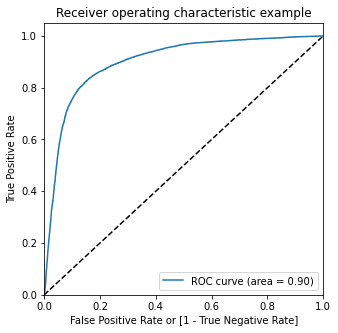

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Churned, 
                                         y_train_sm_pred_final.Churned_Prob, drop_intermediate = False )

draw_roc(y_train_sm_pred_final.Churned, y_train_sm_pred_final.Churned_Prob)

#### Finding optimal cutoff

In [91]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churned_Prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Churned,Churned_Prob,Churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.136297,0,1,1,0,0,0,0,0,0,0,0
1,0,0.401954,0,1,1,1,1,1,0,0,0,0,0
2,0,0.316766,0,1,1,1,1,0,0,0,0,0,0
3,0,0.370437,0,1,1,1,1,0,0,0,0,0,0
4,0,0.498213,0,1,1,1,1,1,0,0,0,0,0


In [92]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churned, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.687396  0.977551  0.397242
0.2   0.2  0.752048  0.957383  0.546713
0.3   0.3  0.791243  0.926431  0.656056
0.4   0.4  0.817348  0.892835  0.741860
0.5   0.5  0.833575  0.856595  0.810556
0.6   0.6  0.836323  0.807186  0.865460
0.7   0.7  0.821314  0.732424  0.910203
0.8   0.8  0.755392  0.562111  0.948673
0.9   0.9  0.610328  0.240046  0.980610


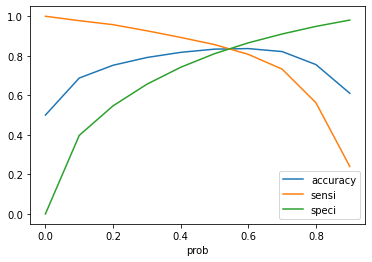

In [93]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The **Optimal cutoff** can be seen somewhere **b/w 0.5 and 0.6** so, let's calculate for more refined value.

In [94]:
# creating columns with different probability cutoffs b/w 0.5 and 0.6 
numbers = [0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churned_Prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Churned,Churned_Prob,Churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.136297,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.401954,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.316766,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.370437,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.498213,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# calculate accuracy sensitivity and specificity for various probability cutoffs b/w 0.5 and 0.6.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churned, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.833575  0.856595  0.810556
0.51  0.51  0.834405  0.852240  0.816570
0.52  0.52  0.835468  0.848144  0.822791
0.53  0.53  0.836219  0.843633  0.828805
0.54  0.54  0.836738  0.838397  0.835079
0.55  0.55  0.837075  0.833575  0.840574
0.56  0.56  0.837127  0.828391  0.845863
0.57  0.57  0.837567  0.823414  0.851721
0.58  0.58  0.837101  0.818540  0.855662
0.59  0.59  0.836427  0.812733  0.860120


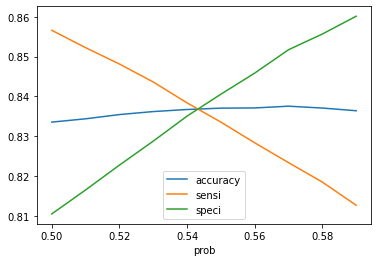

In [96]:
# plot accuracy, sensitivity and specificity for various probabilities b/w 0.5 and 0.6
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The **optimal cutoff** seems to converge at **0.54**.

In [97]:
# taking 0.54 as optimal cutoff probability

y_train_sm_pred_final['final_Churn_pred'] = y_train_sm_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_train_sm_pred_final.head()

,Churned,Churned_Prob,Churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_Churn_pred
0,0,0.136297,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.401954,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.316766,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.370437,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.498213,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_sm_pred_final.Churned, y_train_sm_pred_final.final_Churn_pred)

0.836737868104521

In [99]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Churned, y_train_sm_pred_final.final_Churn_pred)
confusion2

array([[16107,  3181],
       [ 3117, 16171]], dtype=int64)

In [100]:
# Predicted     not_churned    churned
# Actual
# not_churned        16107     3181
# churned            3117      16171  

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Accuracy
Accuracy = float(TP+TN)/float(TP+TN+FP+FN)
Accuracy

0.836737868104521

In [103]:
# sensitivity 
Sensitivity = TP / float(TP+FN)
Sensitivity

0.8383969307341352

In [104]:
# Specificity
Specificity = TN / float(TN+FP)
Specificity

0.8350788054749066

In [105]:
# Calculate false postive rate
FPR = FP/ float(TN+FP)
FPR

0.16492119452509332

In [106]:
# Positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.8356242248863167

In [107]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.8378589263420724

#### Precision and Recall Tradeoff

In [108]:
# using sklearn utilities
from sklearn.metrics import precision_score, recall_score

#precision
precision_score(y_train_sm_pred_final.Churned, y_train_sm_pred_final.final_Churn_pred)

0.8356242248863167

In [109]:
# recall
recall_score(y_train_sm_pred_final.Churned, y_train_sm_pred_final.final_Churn_pred)

0.8383969307341352

In [110]:
# precision-recall curve
from sklearn.metrics import precision_recall_curve
y_train_sm_pred_final.Churned, y_train_sm_pred_final.final_Churn_pred

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38571    1
 38572    1
 38573    1
 38574    1
 38575    1
 Name: Churned, Length: 38576, dtype: int32,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38571    1
 38572    1
 38573    1
 38574    0
 38575    1
 Name: final_Churn_pred, Length: 38576, dtype: int64)

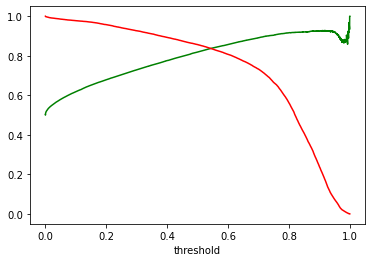

In [111]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Churned, y_train_sm_pred_final.Churned_Prob)

# tradeoff plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('threshold')
plt.show()

According to the precision-recall trade off plot, the **optimal cutoff** point seems to be b/w **0.5 and 0.6** just as similar to ROC curve.

### Model Testing

In [112]:
# scaling the testing dataset
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,aon_mnth_range_6-12 Months,aon_mnth_range_1-2 Yrs,aon_mnth_range_2-5 Yrs,aon_mnth_range_5 Yrs and above
35865,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0
41952,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,1,0
98938,0.061230,0.003275,0.037889,0.008157,0.010851,0.025458,0.018789,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
29459,0.042998,0.020180,0.000963,0.000297,0.001588,0.003828,0.000573,0.0,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0,0
70682,0.098384,0.005699,0.011111,0.039505,0.084425,0.242612,0.135335,0.0,0.000721,0.000521,...,1,0,0,0,1,0,0,1,0,0


In [113]:
# feature selection using rfe columns
X_test = X_test[rfe_col3]
X_test.head()

,roam_ic_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,arpu_6_7
35865,0.000000,0.000000,0.000000,0.000000,0.000053,0.003321,0.002782,0.009587,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
41952,0.000000,0.000000,0.005379,0.018971,0.009067,0.023235,0.022029,0.008684,0.000000,0.020408,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
98938,0.000000,0.000000,0.073716,0.000374,0.024987,0.057580,0.183375,0.003706,0.000000,0.035714,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
29459,0.000000,0.000000,0.000000,0.000000,0.000800,0.001622,0.000037,0.011386,0.000000,0.025510,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
70682,0.000721,0.031491,0.041749,0.172443,0.157573,0.021147,0.066205,0.002352,0.080257,0.061224,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [114]:
# adding constant
X_test_SM = sm.add_constant(X_test)

#### Predictions on testing dataset

In [115]:
# predictions
y_test_pred = res.predict(X_test_SM)
y_test_pred[:10]

35865    0.775780
41952    0.531922
98938    0.000258
29459    0.123966
70682    0.007403
58317    0.241008
4860     0.007752
16890    0.714619
61329    0.676195
94332    0.474228
dtype: float64

In [116]:
# Converting predictions in form of dataframe
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.775780
41952,0.531922
98938,0.000258
29459,0.123966
70682,0.007403


In [117]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [118]:
# Removing index from both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)
y_pred_final.head()

,Churn,0
0,0,0.775780
1,0,0.531922
2,0,0.000258
3,0,0.123966
4,0,0.007403


In [119]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churned_Prob'})
y_pred_final.head()

,Churn,Churned_Prob
0,0,0.775780
1,0,0.531922
2,0,0.000258
3,0,0.123966
4,0,0.007403


In [120]:
# taking perspective of sensivity-specificity, threshold = 0.54

y_pred_final['Churn_test_pred'] = y_pred_final.Churned_Prob.map(lambda x: 1 if x > 0.54 else 0)  
y_pred_final.head()

,Churn,Churned_Prob,Churn_test_pred
0,0,0.775780,1
1,0,0.531922,0
2,0,0.000258,0
3,0,0.123966,0
4,0,0.007403,0


In [121]:
# overall accuracy
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.Churn_test_pred)

0.8251305410509944

In [122]:
# Confusin matrix
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.Churn_test_pred)
confusion

array([[6847, 1425],
       [ 149,  580]], dtype=int64)

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# sensitivity = recall = true positive rate
TP / float(TP+FN)

0.7956104252400549

In [125]:
# specificity
TN / float(TN+FP)

0.8277321083172147

In [126]:
# precision
precision_score(y_pred_final.Churn, y_pred_final.Churn_test_pred)

0.2892768079800499

In [127]:
# recall
recall_score(y_pred_final.Churn, y_pred_final.Churn_test_pred)

0.7956104252400549

In [128]:
# Calculate false postive rate
FP/ float(TN+FP)

0.1722678916827853

In [129]:
# Positive predictive value 
TP / float(TP+FP)

0.2892768079800499

In [130]:
# Negative predictive value
TN / float(TN+ FN)

0.9787021154945683

#### ROC curve for the test dataset

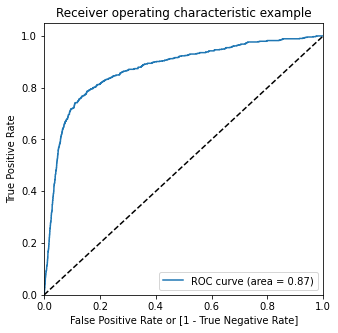

In [131]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Churn,y_pred_final.Churned_Prob, drop_intermediate = False )

# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.Churn,y_pred_final.Churned_Prob)

##### Observations of train data
- ROC = 0.90
- Accuracy = 83.6%
- True Postive Rate or Sensitivity = 83.8%

##### Observations of test data
- ROC = 0.87
- Accuracy = 82.5%
- True Postive Rate or Sensitivity = 79.5%


## Data Modelling
### Logistic Regression using PCA

In [132]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
print('dimensions of training data: ',X_train.shape,'\n',
     'dimensions of testing data: ',X_test.shape)

dimensions of training data:  (21000, 126) 
 dimensions of testing data:  (9001, 126)


In [133]:
# scaling the data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [134]:
# applying SMOTE for handling data imbalance
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# shape of the training set 
print('dimensions of X_train_sm: ',X_train_sm.shape,'\n',
     'dimensions of y_train_sm): ',y_train_sm.shape)

dimensions of X_train_sm:  (38576, 126) 
 dimensions of y_train_sm):  (38576,)


In [135]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on training data
pca.fit(X_train_sm)
X_train_sm_pca = pca.fit_transform(X_train_sm)

# applying PCA on testing data
X_test_pca = pca.fit_transform(X_test)

# dimensions of both datasets after applying PCA
print('dimensions of X_train_sm_pca: ',X_train_sm_pca.shape,'\n',
     'dimensions of X_test_pca: ',X_test_pca.shape)

dimensions of X_train_sm_pca:  (38576, 126) 
 dimensions of X_test_pca:  (9001, 126)


In [136]:
# Components of pca
pca.components_

array([[ 1.37270794e-02,  1.17318797e-02,  1.55480415e-02, ...,
         6.66843255e-02,  4.79683921e-02, -2.79904997e-03],
       [ 9.63430262e-04, -6.20678186e-04, -2.36168932e-03, ...,
        -6.38946397e-01,  7.60317619e-01, -5.17556740e-04],
       [-1.00967070e-03,  2.31034736e-02,  2.13594632e-02, ...,
        -1.91645812e-02,  9.30873516e-02, -9.87818055e-04],
       ...,
       [-1.85671123e-07,  5.70420435e-06, -1.12764423e-05, ...,
        -4.79814390e-08, -3.40661253e-08, -7.45045752e-08],
       [ 9.76776350e-07,  2.09185260e-07,  1.24207807e-06, ...,
        -4.21315442e-08, -3.80037203e-08, -7.54681081e-09],
       [-0.00000000e+00, -1.35952043e-15,  1.17505753e-15, ...,
        -2.65692411e-18,  7.94923057e-18, -2.21868253e-18]])

#### Applying Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making predictions on test data
y_pred = logreg_pca.predict(X_test_pca)

# Converting predictions into dataframe
y_pred_df = pd.DataFrame(y_pred)

# shape of the predictions datarame
y_pred_df.shape

(9001, 1)

#### Metrics for evaluation

In [138]:
# importing metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

In [139]:
# confusion matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[4162, 4110],
       [ 321,  408]], dtype=int64)

In [140]:
# accuracy
accuracy_score(y_test,y_pred)

0.5077213642928563

In [141]:
# sensitivity
recall_score(y_test,y_pred)

0.5596707818930041

#### pca variance ratio

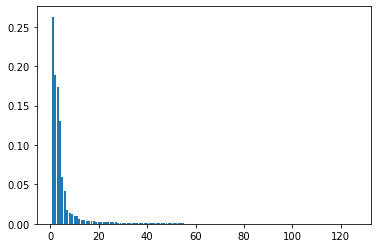

In [142]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

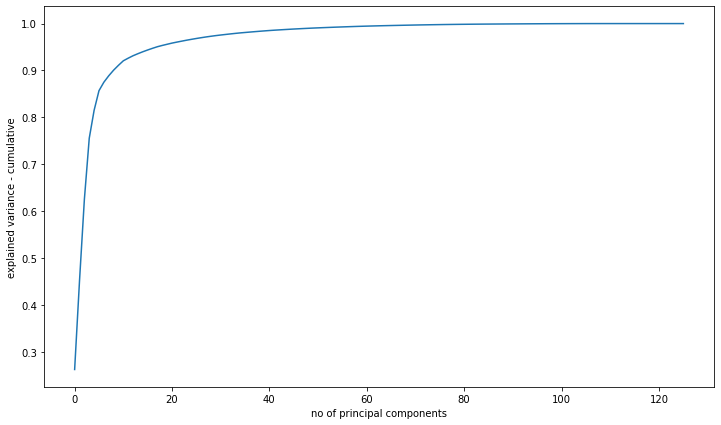

In [143]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [144]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([26.3, 45.2, 62.6, 75.6, 81.6, 85.8, 87.6, 89. , 90.2, 91.2, 92.2,
       92.8, 93.3, 93.7, 94.1, 94.5, 94.9, 95.2, 95.5, 95.8, 96. , 96.2,
       96.4, 96.6, 96.8, 97. , 97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5, 99.5,
       99.5, 99.5, 99.5, 99.5, 99.5])

90% of the data can be explained with 15 PCA components

#### Fitting the data with 15 pca componets

In [145]:
pca_15 = PCA(n_components=15)

train_pca_15 = pca_15.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_15.shape)

test_pca_15 = pca_15.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_15.shape)

Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


#### Tuning hyperparameter C

In [146]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [147]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(train_pca_15, y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [148]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062716,0.009626,0.003635,0.000770,0.01,{'C': 0.01},0.752025,0.748971,0.757363,0.760881,...,0.752919,0.005599,6,0.755902,0.751364,0.752767,0.752139,0.756553,0.753745,0.002085
1,0.096086,0.008544,0.004001,0.000699,0.1,{'C': 0.1},0.777633,0.787037,0.788376,0.795078,...,0.784939,0.006962,5,0.785654,0.785130,0.787716,0.785390,0.783416,0.785461,0.001373
2,0.116682,0.008721,0.004267,0.001111,1,{'C': 1},0.782336,0.788837,0.792807,0.798446,...,0.789658,0.005583,4,0.791023,0.790455,0.792764,0.789539,0.789125,0.790581,0.001279
3,0.133813,0.012124,0.003523,0.001099,10,{'C': 10},0.782597,0.789609,0.793589,0.798187,...,0.790175,0.005373,3,0.791281,0.790649,0.793088,0.789214,0.789060,0.790659,0.001478
4,0.130724,0.010588,0.003807,0.000829,100,{'C': 100},0.782859,0.789609,0.793849,0.798187,...,0.790279,0.005334,1,0.791475,0.790649,0.793023,0.789150,0.789060,0.790672,0.001489
5,0.135322,0.009402,0.004040,0.001466,1000,{'C': 1000},0.782859,0.789609,0.793849,0.797927,...,0.790228,0.005257,2,0.791540,0.790649,0.793088,0.789150,0.789060,0.790697,0.001517


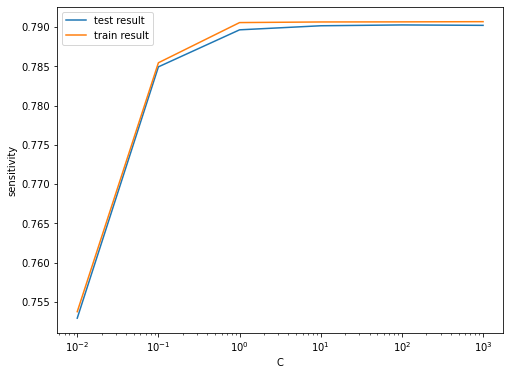

In [149]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [150]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.7902794568666704 at C = 100


### Logistic regression with optimal C

In [151]:
# Instantiate the model with best C
logreg_pca = LogisticRegression(C=best_C)

In [152]:
# Fit the model on the train set
log_pca_model = logreg_pca.fit(train_pca_15, y_train_sm)

In [153]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(train_pca_15)

In [154]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_sm, y_train_pred)
confusion

array([[14512,  4776],
       [ 4050, 15238]], dtype=int64)

In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_train_sm, y_train_pred))

# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))

# Specificity
print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.7712048942347574
Sensitivity:  0.7900248859394442
Specificity:  0.7523849025300705


In [157]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(test_pca_15)

In [158]:
# Checking the Confusion matrix
confusion = confusion_matrix(y_test,y_test_pred)
print("Confusion Matirx for y_test & y_pred\n",confusion,"\n")

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_test_pred))

# Checking the TPR or Recall or Sensitivity of the Predicted model.
print("Sensitivity of the logistic regression model with PCA: ",recall_score(y_test,y_test_pred))

# Checking the Specificity of the Predicted model.
print("Specificity of the logistic regression model with PCA: ",TN / float(TN+FP))

Confusion Matirx for y_test & y_pred
 [[6251 2021]
 [ 186  543]] 

Accuracy of the logistic regression model with PCA:  0.7548050216642596
Sensitivity of the logistic regression model with PCA:  0.7448559670781894
Specificity of the logistic regression model with PCA:  0.7556818181818182


##### Observations of train data after applying PCA
- Accuracy:  77.12 %
- Sensitivity:  79.01 %
- Specificity:  75.24 %

##### Observations of test data after applying PCA
- Accuracy:  75.48 %
- Sensitivity:  74.48 %
- Specificity:  75.56 %

#### With No PCA
##### Observations of train data
- ROC = 0.90
- Accuracy = 83.6%
- True Postive Rate or Sensitivity = 83.8%
- Specificity = 83.50%

##### Observations of test data
- ROC = 0.87
- Accuracy = 82.5%
- True Postive Rate or Sensitivity = 79.5%
- Specificity = 82.77%

According to the aforementioned metrics, this model can be considered as a good model

## Recommendations

**The impotant attributes  along with their coefficients are:**

   
   
- roam_ic_mou_7	      =           8.6968	
 
- roam_og_mou_8	      =           2.9360	 
- loc_og_t2m_mou_8    =    -4.0745	
- std_og_mou_7	      =    8.5650	
 
- total_og_mou_8	  =   -22.9721	
 
- loc_ic_mou_6	   =      9.8331	
 
- loc_ic_mou_8	     =   -32.2775	
 
- std_ic_mou_8	  =       -12.5345	
 
- spl_ic_mou_8	   =   -19.8274	
 
- total_rech_num_8	=     -8.0619	
 
- last_day_rch_amt_8  = 	   -19.8420	
 
- total_rech_data_8	  =     -8.7629	
 
- av_rech_amt_data_8  	=   -6.1883

- vol_2g_mb_8	     =     -10.6667	

- monthly_2g_8	  =         -5.8262

- aug_vbc_3g	    =     -7.0626	

- arpu_6_7	     =          15.0890	


The attributes with negative coefficients are inversely correlated with the churn probability i.e. for eg. if the local outgoing calls  (**'loc_og_t2m_mou_8'**)  are decreasing for the 8th month(i.e. action phase) then the probability for a customer to churn is higher.

**Therfore the recommendations are:**

- Target those customers whose local outgoing calls and all kinds of incoming calls are less in the action phase(august month).
- The customers with increase in local incoming calls for the month of june must aslo be targeted.
- Target those customers whose total recharges are decreasing in the action phase.
- The customers with increase in roaming incoming calls for july and std outgoing calls for july and august are also of importance.
- The ones who have reduced the usage of data and therfore making less recharges in the august month are  also of utmost importance.
- The customers whose usage of data whether in 2g or 3g decreased for the month of august must also be targeted.